# 無限期間モデル（新古典派成長モデル）

- ロビンソン・クルーソーの無人島生活と違って、われわれが生活する社会では明確な最終期は存在しない

- あるいは、自分の世代から子供、孫、またその子供と続く王朝的な経済活動を考える

- 無限期間モデル(infinite horizon model)では、そのような永続的な経済活動を考える

- 代表的個人が存在する経済を無限期間に拡張する

- ロビンソン・クルーソーは無限期間の消費から得られる効用の割引現在価値を最大化するように、消費と貯蓄を選択する

$$
  \max_{\{c_{t},k_{t+1}\}_{t=0}^{\infty}} \sum_{t=0}^{\infty} \beta^{t} u(c_{t})
$$

subject to

$$
  c_{t} + k_{t+1} \leq f(k_{t}) + (1-\delta)k_{t}, k_{0} \text{ given.}
$$

ここで、資本$k_{t}$は財$f(k_{t})$を生み出すが、$\delta$の割合で減耗する

- これをベルマン方程式の形で書き換えると

$$
  V(k_{t}) = \max\{u(f(k_{t})+(1-\delta)k_{t}-k_{t+1}) + \beta V(k_{t+1})\}
$$

あるいは、経済主体の意思決定を再帰的(recursive)に書き直すと

$$
  V(k) = \max\{u(f(k)+(1-\delta)k-k') + \beta V(k')\} \tag{6}
$$

- 時間をあらわすサブスクリプト$t+1$の代わりに、次期の変数を$k'$と表記している：有限期間モデルでは、時間が状態変数の一つとなっていたが、ここでは時間を明示的に書く必要がない

# 無限期間モデルの解法
## ベルマン方程式の特徴付け

- 動的計画法及びその数値計算を正しく使うためには、理論的な理解が重要になってくる

- ここではベルマン方程式の重要な性質について、直観的な結果だけ証明なしで紹介する
  - 動的計画法について詳細な理解が得たいのであれば、Stokey et al.(1989)にじっくりと取り組むこと

- (6)式の解法は、有限期間モデルの後ろ向き帰納法と似ている

- 価値関数反復法(value function iteration, VFI)には昔から多くの研究の蓄積があり、その長所と短所もはっきりしている

- 有限期間モデルの場合には、$V_{T}(k)$から始まって後ろ向きに$V_{T-1}(k),V_{T-2}(k),...,V_{0}(k)$と計算することで、全期間の価値関数を計算することができた

- 無限期間モデルの場合には、任意に価値関数$V^{(0)}(k)$を推測して、有限期間モデルの場合と同じように

$$
  V^{(1)}(k) = \max_{k'} u(c) + \beta V^{(0)}(k')
$$

を計算する

- その後、得られた$V^{(1)}(k)$を右辺に代入して、

$$
  V^{(2)}(k) = \max_{k'} u(c) + \beta V^{(1)}(k')
$$

を同じように計算する

- 縮小写像の性質(contraction mapping property)により、「一定の条件下において」、この繰り返し計算により得られた$V^{(0)}(k),V^{(1)}(k),...$は真の価値関数に収束(converge)する

- 多くの数値計算手法では、もっともらしい値が得られていても本当に真の値に収束しているのか、理論的にきちんと確認できないことが多い

- VFIの縮小写像の性質は、モデルをベルマン方程式の形にして一定の条件を満たすことができれば、数値的に分析可能にしてくれるという意味で極めて強い性質である

## 数値計算

### 状態変数と操作変数を離散化する

- $u(c)=\ln c, f(k)=k^{\alpha}, \delta=1$と特定化した場合、次のような解析的解が存在する

\begin{align*}
  V(k) &= A + B\ln k, \\
  A &= (1-\beta)^{-1}\big[\ln(1-\alpha\beta) + \frac{\alpha\beta}{1-\alpha\beta}\ln\alpha\beta\big], \quad B = \frac{\alpha}{1-\alpha\beta}, \\
  k' &= \alpha\beta k^{\alpha}
\end{align*}

- 近似的な計算によって得られた数値解と解析的解がどの程度近いかを確認する

- 状態変数$k$および操作変数$k'$を$I$個のグリッド$k^{i}\in\{k^{1},...,k^{I}\}$で離散化する
  - グリッドの下限については、正値とする：$k^{1}>0$
  - 上限については、場合によっては試行錯誤が必要になる：政策関数と45度線が交わる点の右側（資本が減少していく）に設定

- アルゴリズム


1. グリッド生成：状態変数および操作変数をそれぞれ$I=J=10000$個のグリッドに区切る。また、グリッド上における価値関数$V^{(0)}(k^{i})$の初期値を当て推量(initial guess)する

2. 収束の基準：収束の基準になるパラメータ$\varepsilon=10^{-5}$を与える

3. 効用関数を設定：効用関数$u([k^{i}]^{\alpha}+(1-\delta)k^{i}-k^{j})$を状態変数と操作変数の全てのグリッド($I \times J$個)上で評価する

4. 価値関数の組み合わせを計算：各状態変数$k^{i}$について、

$$
  \tilde{V}(k^{i},k^{j}) = u([k^{i}]^{\alpha}+(1-\delta)k^{i}-k^{j}) + \beta V^{(0)}(k^{j})
$$

を計算する

5. 価値関数を最大にする貯蓄を探す：各$k^{i}$について、$V^{(1)}(k^{i})=\max_{k^{j}}\tilde{V}(k^{i},k^{j})$を計算する

6. 全ての$k^{i}$について$\|V^{(0)}(k^{i})-V^{(1)}(k^{i})\|<\varepsilon$であればストップ。そうでなければ、$V^{(1)}(k^{i})$を$V^{(0)}(k^{i})$に代入して、ステップ4-5を繰り返す

In [1]:
%%file CRRA.m
function util = CRRA(cons,gamma)

if gamma ~= 1;
    util = (cons.^(1-gamma)-1)./(1-gamma);
else
    util = log(cons);
end

return;

Created file 'C:\Users\takek\Dropbox\teaching\2021winter\macrotopicsA2021\CRRA.m'.


In [2]:
global beta gamma alpha capital vfcn kgrid

%% *** カリブレーション ***
beta  = 0.96; % 割引因子
gamma = 1.0;  % 相対的危険回避度(異時点間の代替の弾力性の逆数)
alpha = 0.40; % 資本分配率
delta = 1.00; % 固定資本減耗(0.08)

In [3]:
% *** 離散化用のパラメータ ***
nk   = 101;  % グリッドの数
kmax = 0.5;   % 資本グリッドの最大値
%kmax = 10.0; % 資本グリッドの最大値(固定資本減耗=0.08の場合に使用)
kmin = 0.05;  % 資本グリッドの最小値 (0にすると生産が出来なくなる)

In [4]:
% *** 収束の基準 ***
it = 1;          % ループ・カウンター
maxit = 1000;    % 繰り返し計算の最大値
tol  = 1.0e-005; % 許容誤差(STEP 2)
dif1 = 1;        % 価値関数の繰り返し誤差
dif2 = 1.0;      % 政策関数の繰り返し誤差
count = 1;

In [5]:
%% STEP 1(a): グリッド生成
kgrid = linspace(kmin, kmax, nk)';

In [6]:
%% STEP 1(b): 価値関数・政策関数の初期値を設定
vfcn  = zeros(nk, 1);
pfcn  = zeros(nk, 1);
Tvfcn = zeros(nk, 1);
Tpfcn = zeros(nk, 1);
vkp   = zeros(nk, nk);
val_tmp = zeros(nk, 4);

In [7]:
%% 解析的解
AA = (1.0-beta).^(-1) * (log(1.0-alpha*beta) + ((alpha*beta)/(1.0-alpha*beta))*log(alpha*beta));
BB = alpha/(1.0-alpha*beta);
v_true = AA + BB*log(kgrid);
p_true = beta*alpha*(kgrid.^alpha);

In [8]:
%% STEP 3: 効用関数の組み合わせ

% 効用関数の初期値 (消費が0以下になる組み合わせにはペナルティ)
util = -10000.0*ones(nk, nk);

% 消費が正値になる(k,k')の組み合わせについて効用を計算
for i = 1:nk
    %  あらゆる操作変数k'について:
    for j = 1:nk
        wealth = kgrid(i).^alpha + (1.0-delta).*kgrid(i);
        cons = wealth - kgrid(j);
        if cons > 0
           util(j,i) = CRRA(cons, gamma);
        end
    end
end

In [9]:
%% STEP 4: 価値関数を繰り返し計算
while it < maxit && dif1 > tol

    % ベルマン方程式: V(k;k')
    for i = 1:nk
        vkp(:,i) = util(:,i) + beta.*vfcn;
    end
    
    % 最適化: 各kについてV(k;k')を最大にするk'を探す
    [Tvfcn, ploc] = max(vkp);
    Tvfcn = Tvfcn';
    Tpfcn = kgrid(ploc);
    
    % 繰り返し計算誤差を確認
    dif1 = max(abs((Tvfcn-vfcn)./vfcn));

    % 価値関数・政策関数をアップデート
    vfcn = Tvfcn;
    pfcn = Tpfcn;
    fprintf('iteration index: %i, iteration diff of value: %d, iteration diff of policy: %d \n', it, dif1, dif2);
    
    it = it + 1;

end

iteration index: 1, iteration diff of value: Inf, iteration diff of policy: 1 
iteration index: 2, iteration diff of value: 2.744252e+00, iteration diff of policy: 1 
iteration index: 3, iteration diff of value: 7.753374e-01, iteration diff of policy: 1 
iteration index: 4, iteration diff of value: 4.316016e-01, iteration diff of policy: 1 
iteration index: 5, iteration diff of value: 2.924695e-01, iteration diff of policy: 1 
iteration index: 6, iteration diff of value: 2.180950e-01, iteration diff of policy: 1 
iteration index: 7, iteration diff of value: 1.721794e-01, iteration diff of policy: 1 
iteration index: 8, iteration diff of value: 1.410964e-01, iteration diff of policy: 1 
iteration index: 9, iteration diff of value: 1.187272e-01, iteration diff of policy: 1 
iteration index: 10, iteration diff of value: 1.019016e-01, iteration diff of policy: 1 
iteration index: 11, iteration diff of value: 8.877882e-02, iteration diff of policy: 1 
iteration index: 12, iteration diff of 

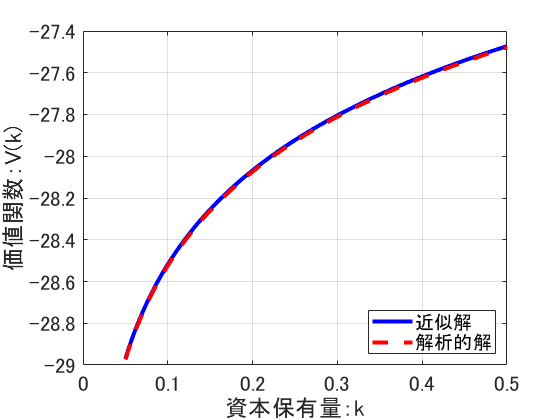

In [10]:
%% 図を描く
figure;
plot(kgrid, vfcn, '-', 'color', 'blue', 'linewidth', 3); hold('on');
plot(kgrid, v_true, '--', 'color', 'red', 'linewidth', 3); hold('off');
%title('価値関数', 'fontsize', 16);
xlabel('資本保有量：k', 'Fontsize', 16);
ylabel('価値関数：V(k)', 'Fontsize', 16);
xlim([0,kmax]);
legend('近似解', '解析的解', 'Location', 'SouthEast');
grid on;
set(gca,'Fontsize', 16);
% saveas (gcf,'Fig3_dndp1.eps','epsc2');

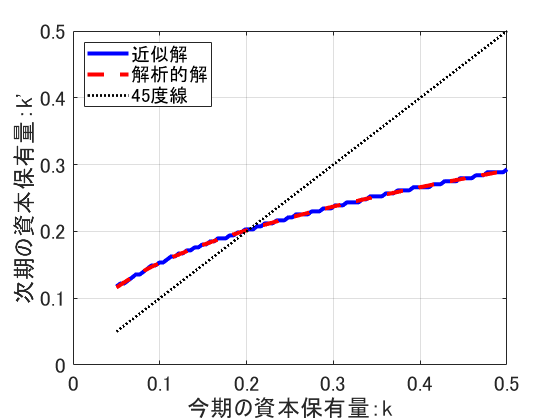

In [11]:
figure;
plot(kgrid, pfcn, '-', 'color', 'blue', 'linewidth', 3); hold('on');
plot(kgrid, p_true, '--', 'color', 'red', 'linewidth', 3);
plot(kgrid, kgrid, ':', 'color', 'black', 'linewidth', 2); hold('off');
%title('政策関数', 'fontsize', 16);
xlabel('今期の資本保有量：k', 'Fontsize', 16);
ylabel("次期の資本保有量：k'", 'Fontsize', 16);
xlim([0,kmax]);
legend('近似解', '解析的解', '45度線', 'Location', 'NorthWest');
grid on;
set(gca,'Fontsize', 16);

### 操作変数が連続な場合

- モデルを拡張する場合には、より洗練された手法が必要になる

- 状態変数のみ離散近似をして、操作変数については連続的な値を取り、価値関数を状態変数の間の値で評価するときは内挿法を用いる

- アルゴリズム


1. グリッド生成：状態空間の評価点を$I=21$個のグリッドに区切る。また、グリッド上における価値関数$V^{(0)}(k^{i})$の初期値を当て推量(initial guess)する

2. 収束の基準：収束の基準になるパラメータ$\varepsilon=10^{-5}$を与える

3. 近似・評価：$k^{i}$上にない価値関数の値については近似する必要がある。$V(k;\mathbb{b})$をパラメータ$\mathbb{b}$を使って近似した時の、$k$上での価値関数の値とする

4. 最適化：各$k^{i}$について、

$$
  V^{(1)}(k^{i}) = \max_{k'} u([k^{i}]^{\alpha}+(1-\delta)k^{i}-k') + \beta V^{(0)}(k';\mathbb{b})
$$

を計算する。価値関数を最大にする$k'$を探すためには、各言語の最適化関数を利用する

5. 全ての$k^{i}$について$\|V^{(0)}(k^{i})-V^{(1)}(k^{i})\|<\varepsilon$であればストップ。そうでなければ、$V^{(1)}(k^{i})$を$V^{(0)}(k^{i})$に代入して、ステップ3-4を繰り返す

In [ ]:
global beta gamma alpha capital vfcn kgrid

%% *** カリブレーション ***
beta  = 0.96; % 割引因子
gamma = 1.0;  % 相対的危険回避度(異時点間の代替の弾力性の逆数)
alpha = 0.40; % 資本分配率
delta = 1.00; % 固定資本減耗(0.08)

In [ ]:
% *** 離散化用のパラメータ ***
nk   = 21;    % グリッドの数
kmax = 0.5;   % 資本グリッドの最大値
%kmax = 10.0; % 資本グリッドの最大値(固定資本減耗=0.08の場合に使用)
kmin = 0.05;  % 資本グリッドの最小値 (0にすると生産が出来なくなる)

In [ ]:
% *** 収束の基準 ***
it = 1;          % ループ・カウンター
maxit = 1000;    % 繰り返し計算の最大値
tol  = 1.0e-005; % 許容誤差(STEP 2)
dif1 = 1.0;      % 価値関数の繰り返し誤差
dif2 = 1.0;      % 政策関数の繰り返し誤差
count = 1;

In [ ]:
%% STEP 1(a): グリッド生成
kgrid = linspace(kmin, kmax, nk)';

In [ ]:
%% STEP 1(b): 価値関数・政策関数の初期値を当て推量
pfcn0 = zeros(nk, 1);
vfcn0 = zeros(nk, 1); %CRRA(kgrid.^alpha + (1.-delta).*kgrid, gamma);
pfcn1 = zeros(nk, 1);
vfcn1 = zeros(nk, 1);

In [ ]:
%% 解析的解
AA = (1.0-beta).^(-1) * (log(1.0-alpha*beta) + ((alpha*beta)/(1.0-alpha*beta))*log(alpha*beta));
BB = alpha/(1.0-alpha*beta);
v_true = AA + BB*log(kgrid);
p_true = beta*alpha*(kgrid.^alpha);

- およそ200回で繰り返し計算誤差は$\varepsilon=1.0^{-5}$以下になる

- 価値関数の繰り返し計算誤差より政策関数の繰り返し計算誤差の方が早く0に近づいている

In [ ]:
global beta gamma alpha delta capital vfcn kgrid

%% STEP 4: 価値関数を繰り返し計算
while it < maxit && dif1 > tol

    fprintf('iteration index: %i \n', it);
    fprintf('value function iteration error: %e\n', dif1);
    fprintf('policy function iteration error: %e\n', dif2);

    for i = 1:nk

        % グローバル変数を設定
        % fminsearchで使う関数(BellmanEq)に最適化する変数"以外"の変数を渡す(グローバル変数を使わない方法もあるはず)
        capital = kgrid(i);
        vfcn = vfcn0;

        % MATLABの最適化関数(fminsearch)を使ってグリッド上で価値関数と政策関数の値を探す
        % 初期値は0.01
        [pfcn1(i,1), vfcn1(i,1)] = fminsearch(@BellmanEq, 0.01);

    end

    % fminsearchは最小値を探す関数なので符号を反転させる
    vfcn1 = -1*vfcn1;

    % 繰り返し計算誤差を確認
    dif1 = max(abs((vfcn1-vfcn0)./vfcn0));

    % 価値関数・政策関数をアップデート
    vfcn0 = vfcn1;
    pfcn0 = pfcn1;

    it = it + 1;

end

In [ ]:
%% 図を描く
figure;
plot(kgrid, vfcn0, '-', 'color', 'blue', 'linewidth', 3); hold('on');
plot(kgrid, v_true, '--', 'color', 'red', 'linewidth', 3); hold('off');
%title('価値関数', 'fontsize', 16);
xlabel('資本保有量：k', 'Fontsize', 16);
ylabel('価値関数：V(k)', 'Fontsize', 16);
xlim([0, kmax]);
legend('近似解', '解析的解', 'Location', 'SouthEast');
grid on;
set(gca,'Fontsize', 16);

In [ ]:
figure;
plot(kgrid, pfcn0, '-', 'color', 'blue', 'linewidth', 3); hold('on');
plot(kgrid, p_true, '--', 'color', 'red', 'linewidth', 3);
plot(kgrid, kgrid, ':', 'color', 'black', 'linewidth', 2); hold('off');
%title('政策関数', 'fontsize', 16);
xlabel('今期の資本保有量：k', 'Fontsize', 16);
ylabel("次期の資本保有量：k'", 'Fontsize', 16);
xlim([0, kmax]);
legend('近似解', '解析的解', '45度線', 'Location', 'NorthWest');
grid on;
set(gca,'Fontsize', 16);

In [ ]:
% 最終的な政策関数が得られてから消費関数を計算
cfcn = kgrid.^alpha + (1.-delta).*kgrid - pfcn0;

figure;
plot(kgrid, cfcn(:,1), '-', 'color', 'blue', 'linewidth', 3);
%title('消費関数', 'fontsize', 16);
xlabel('資本保有量：k', 'Fontsize', 16);
ylabel('消費：c', 'Fontsize', 16);
grid on;
set(gca,'Fontsize', 16);

- オイラー方程式$u'(c)=\beta u'(f(k')-g(k'))f'(k')$における計算誤差は、以下の式で得られる

$$
  \frac{\beta u'\big([g(k^{i})]^{\alpha}-g(g(k^{i}))\big)f'(g(k^{i}))}{u'\big([k^{i}]^{\alpha}-g(k^{i})\big)}-1
$$

ここで、$k'=g(k)$である

In [ ]:
%% オイラー方程式から誤差を測定
%kgrid_err = linspace(kmin, kmax, (nk-1)*10+1)';
kgrid_err = kgrid; %linspace(kmin, kmax, (nk-1)*10+1)';
kp = interp1(kgrid,pfcn0(:,1),kgrid_err); % 線形補間
%kp   = pfcn0(:,1);
cons = kgrid_err.^alpha + (1.-delta).*kgrid_err - kp;
LHS  = mu_CRRA(cons, gamma);

kpp  = interp1(kgrid, pfcn0(:,1), kp);
cnext = kp.^alpha + (1.-delta).*kp - kpp;
rent = alpha.*kp.^(alpha-1.0) - delta;
RHS  = beta.*(1.+rent).*mu_CRRA(cnext, gamma);

err  = RHS./LHS-1.0;

In [ ]:
figure;
plot(kgrid_err, abs(err), 'ro-', 'LineWidth', 3);
%hold on;
%plot(kgrid_err, abs(err2), '--', 'Color', 'red', 'LineWidth', 3);
xlabel('資本保有量：k', 'FontSize', 16);
ylabel('オイラー方程式誤差(絶対値)', 'FontSize', 16);
xlim([kmin kmax]);
%xticks([0.05 0.1 0.2 0.3 0.4 0.5]);
%xticklabels([0.05 0.1 0.2 0.3 0.4 0.5]);
%legend('TI', 'VFI', 'Location', 'NorthEast');
grid on;
set(gca,'FontSize', 16);

csvwrite('err_ddp.csv',err);